# Analysis of Vodafone users' fluxes

The study of the flux of people inside urban areas is of paramount importance to achieve an optimal understanding of emerging critical issues in the local mobility, and to explore areas of potential improvements in the infrastructures and local transports.

The mobility of users within and toward Padova has been monitored using the data provided by the Vodafone mobile carrier, which provides the information based on the users' connections to the network cells.
The data provided by the carrier encompasses the monitoring of the users connected to the Vodafone network in Padova in a four-month period from February to May of 2018.

To provide statistical insights on the number and the flow of users, the data is aggregated based on the origin and movements of the users by averaging the number of connections during the time of the monitoring.

To further avoid privacy violation issues, all observations with less than 30 units (e.g. day-areas for which $<$30 users have contributed) have been discarded and/or merged into dedicated categories (indicated with "altro", or "other").


## Datasets 

The data is provided in `.csv` files.

* __day_od.csv__: table of the origins and destinations of the users averaged by the day of the week. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).
* __distinct_users_day.csv__: table of the number of distinct users by origin. The data is provided with details of the month, type of user (resident in Padova/Italian visitor/foreign visitor), country of provenance, together with the province and comune of the user (if available).

The information is stored in the fields according to the following scheme: 

- __MONTH__: month analyzed
- __DOW__: day analyzed
- __ORIGIN__: users' origin area (do not consider this field)
- __DESTINATION__: users' destination area (do not consider this field)
- __CUST_CLASS__: user type (resident / Italian visitor / foreigner visitor)
- __COD_COUNTRY__: users' country code (e.g. 222=Italy)
- __COD_PRO__: users' province code (e.g. 12=Varese) 
- __PRO_COM__: users' comune code (e.g. 12026=Busto Arsizio)
- __FLOW__: number of movements for given date-time (with a minimum of 30 users)
- __VISITORS__: overall number of users 

Together with the data files, three lookup-tables are provided to allow matching the Italian institute of STATistics (ISTAT) country, province and comune codes to the actual names.

* __codici_istat_comune.csv__: lookup file containing the mapping between _comune_ ISTAT code-names
* __codici_istat_provincia.csv__: lookup file containing the mapping between _province_ ISTAT code-names
* __codici_nazioni.csv__: lookup file containing mapping the _country_ code to its name

Additional information, useful for the study of the flow of users, as the number of inhabitants of each province and the distance between Padova and all other Italian provinces can be extracted based on the data collected by the ISTAT:

   - English: https://www.istat.it/en/analysis-and-products/databases, Italian: https://www.istat.it/it/dati-analisi-e-prodotti/banche-dati
   
   - English/Italian: https://www.istat.it/en/archive/157423, Italian: https://www.istat.it/it/archivio/157423
   
   - `.zip` package containing the distances between comuni in Veneto region: http://www.istat.it/storage/cartografia/matrici_distanze/Veneto.zip

If deemed useful, the open repository [https://github.com/openpolis/geojson-italy](https://github.com/openpolis/geojson-italy) contains a `.json` file with the geographical coordinates of the provences and comuni of Italy.


## Assignments

1. Data preparation: the csv files are originated from different sources, hence resulting in differences in the encoding and end-of-lines that have to be taken into account in the data preparation phase. Make sure each .csv file is properly interpreted.

   1.1 Ranking of visitors from foreign countries: based on the number of total visitors per each country, create a ranked plot of the first 20 countries with the most visitors
   
   1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants: based on the number of total visitors per Italian province, create a ranked plot of the first 20 provinces with the most visitors taking into account the number of inhabitants.


2. Study of the visitors' fluxes: you are asked to provide indications on how to invest resources to improve the mobility towards Padova. Consider the three main directions of visitors and commuters getting to Padova through the main highways (from south, A13 towards Bologna-Roma; from west, A4 towards Milano-Torino; from north-east, A4 towards Venice-Trieste). Evaluate which of the three directions has to be prioritized.

   2.1 Consider a simplified case involving only the mid-range mobility, based on the number of visitors/commuters from the nearby regions only
   
   2.2 Consider the provinces located on the three directions that are mostly contributing to the flow of weekend visitors and working daily commuters by performing a more detailed study of the fluxes based on the day of the week. Use the data available to provide what you believe is the best possible answer.


3. Plot the distribution of the number of visitors by the distance of the province of origin. Determine which kind of function should be used to describe the distribution.

   3.1 Assuming an analytic form can be used to describe the trend, create a regression or a fit to estimate the expected number of visitors by the distance of the province of origin and the corresponding uncertainties. Illustrate the difference between the resulting regression with respect to the numbers provided by the Vodafone monitoring, and highlight the five most striking discrepancies from the expectations.

In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import chardet

# 1. Data preparation

In [2]:
#Using chardet library create a function to define encoding algorithm for each csv file.

def open_dataset(file_name):
    
    with open(file_name, 'rb') as f:
        result = chardet.detect(f.read())

    df = pd.read_csv(file_name, encoding=result['encoding'], sep=',')
    return df

In [3]:
#Creating dataframes from each file to make the work with dataset easier. 

day_od_df = open_dataset('day_od.csv')
distinct_users_day_df = open_dataset('distinct_users_day.csv')
codici_istat_comune_df = open_dataset('codici_istat_comune.csv')
codici_istat_provincia_df = open_dataset('codici_istat_provincia.csv')
codici_nazioni_df = open_dataset('codici_nazioni.csv')

population_df = open_dataset('DCIS_POPRES1_23082023181232317.csv')

In [4]:
#Checking if all the files are properly interpreted: uncomment to check

day_od_df
#distinct_users_day_df
#codici_istat_comune_df
#codici_istat_provincia_df
#codici_nazioni_df
#population_df

,MONTH,DOW,ORIGIN,DESTINATION,CUST_CLASS,COD_COUNTRY,COD_PRO,PRO_COM,FLOW
0,Marzo,Domenica,108,300,visitor,222,28.0,-999.0,493
1,Maggio,Lunedì,300,101,visitor,222,93.0,-999.0,58
2,Febbraio,Sabato,108,207,visitor,222,28.0,-999.0,39
3,Aprile,Venerdì,109,121,resident,222,28.0,28060.0,106
4,Maggio,Giovedì,300,120,visitor,222,28.0,28103.0,136
...,...,...,...,...,...,...,...,...,...
193496,Febbraio,Martedì,205,120,Altro,-999,-999.0,-999.0,32
193497,Marzo,Giovedì,214,115,Altro,-999,-999.0,-999.0,32
193498,Febbraio,Giovedì,124,121,Altro,-999,-999.0,-999.0,40
193499,Aprile,Domenica,110,300,visitor,222,28.0,28086.0,36


# 1.1. Ranking of visitors from foreign countries 

In [5]:
#extract the italian code from the national codes dataframe
italian_code = codici_nazioni_df.query(f'COUNTRY_NAME_IT == "Italia"')['COD_COUNTRY'].values[0]

In [6]:
foreign_visitors_df = distinct_users_day_df[distinct_users_day_df['COD_COUNTRY'] 
                                         != italian_code].drop(columns=['COD_PRO', 'PRO_COM'])
#filter original dataframe by country code (delete italian code) and drop useless columns, create a new dataframe
foreign_visitors_df

,DOW,CUST_CLASS,COD_COUNTRY,VISITORS
184,Giovedì,foreigner,226.0,8944
185,Lunedì,foreigner,214.0,10244
186,Mercoledì,foreigner,515.0,256
187,Sabato,foreigner,424.0,436
188,Domenica,foreigner,502.0,96
...,...,...,...,...
12840,Mercoledì,foreigner,259.0,176
12841,Sabato,foreigner,602.0,164
12842,Giovedì,foreigner,732.0,80
12843,Giovedì,foreigner,297.0,80


In [7]:
#obtain the dataframe with top 20 in number of visitors countries
top_foreign_countries_df = foreign_visitors_df.groupby('COD_COUNTRY').sum().sort_values(by='VISITORS', 
                                                                                    ascending=False).head(20)

#merge the previous dataframe with country codes to easier graph creation
top_foreign_countries_df = top_foreign_countries_df.merge(codici_nazioni_df, 
                                                          left_on='COD_COUNTRY', right_on='COD_COUNTRY')

#show final dataframe
top_foreign_countries_df

,COD_COUNTRY,VISITORS,COUNTRY_NAME_IT
0,208.0,129672,Francia
1,228.0,116884,Svizzera
2,262.0,109176,Germania
3,460.0,107796,Cina
4,232.0,96776,Austria
5,214.0,71872,Spagna
6,204.0,70432,Paesi Bassi
7,310.0,64160,Stati Uniti d'America
8,226.0,59012,Romania
9,234.0,46180,Gran Bretagna


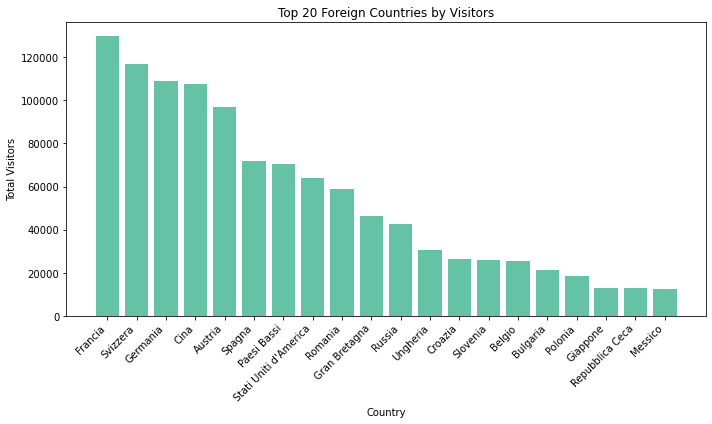

In [8]:
#create a ranked plot of the first 20 countries with the most visitors 

plt.figure(figsize=(10, 6))
plt.bar(top_foreign_countries_df['COUNTRY_NAME_IT'], top_foreign_countries_df['VISITORS'], color='#66c2a5')
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.title('Top 20 Foreign Countries by Visitors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 1.2 Ranking of Italian visitors by province, weighted by the number of inhabitants

In [9]:
#data preparation: filter data and preserve only interested columns

filtered_df_1 = population_df.loc[population_df['ETA1'] == 'TOTAL']
filtered_df_2 = filtered_df_1.loc[population_df['Gender'] == 'total']
final_population_df = filtered_df_2[['Territory','Value']]

final_population_df = final_population_df.rename(columns={'Territory': 'PROVINCIA', 'Value': 'POPULATION'})

final_population_df
#http://dati.istat.it/viewhtml.aspx?il=blank&vh=0000&vf=0&vcq=1100&graph=0&view-metadata=1&lang=en&QueryId=18460&metadata=DCIS_POPRES1

,PROVINCIA,POPULATION
40604,Italy,58850717
40607,Nord-ovest,15817057
40610,Piemonte,4240736
40613,Torino,2198237
40616,Vercelli,165505
...,...,...
40993,Agrigento,412472
40996,Siracusa,383738
40999,Oristano,150041
41001,Monza e della Brianza,871546


In [10]:
#filter data and preserve only visitors

italian_visitors_df = distinct_users_day_df[distinct_users_day_df['CUST_CLASS'] 
                                 == 'visitor'].drop(columns=['COD_COUNTRY', 'PRO_COM'])

In [11]:
#calculate number of visitors per province

top_italian_visitors_df = italian_visitors_df.groupby('COD_PRO').sum()

In [12]:
#merge with the province codes

top_italian_visitors_df = top_italian_visitors_df.merge(codici_istat_provincia_df, 
                                                          left_on='COD_PRO', right_on='COD_PRO')

In [13]:
#merge with the population dataframe according to the name of province, calculate weighted number of visitors

province_visitors = top_italian_visitors_df.merge(final_population_df[['PROVINCIA', 'POPULATION']], 
                                                  on = 'PROVINCIA', how = 'left')

province_visitors['WEIGHTED_VISITORS'] = province_visitors['VISITORS'] / province_visitors['POPULATION']

#sort and form top-20
province_visitors_top_df = province_visitors.sort_values(by='WEIGHTED_VISITORS', ascending=False).head(20)


#preserve only interesting columns
province_visitors_top_df = province_visitors_top_df.drop(columns=['COD_REG','PROV_SIGLA'])
province_visitors_top_df

,COD_PRO,VISITORS,PROVINCIA,POPULATION,WEIGHTED_VISITORS
27,28.0,1932696,Padova,928374.0,2.081808
26,27.0,620236,Venezia,833703.0,0.743953
28,29.0,163464,Rovigo,227418.0,0.718782
23,24.0,431952,Vicenza,850942.0,0.507616
25,26.0,317224,Treviso,876115.0,0.362080
24,25.0,46992,Belluno,197751.0,0.237632
22,23.0,181604,Verona,923950.0,0.196552
37,38.0,53832,Ferrara,338477.0,0.159042
92,93.0,38272,Pordenone,309612.0,0.123613
21,22.0,65148,Trento,542050.0,0.120188


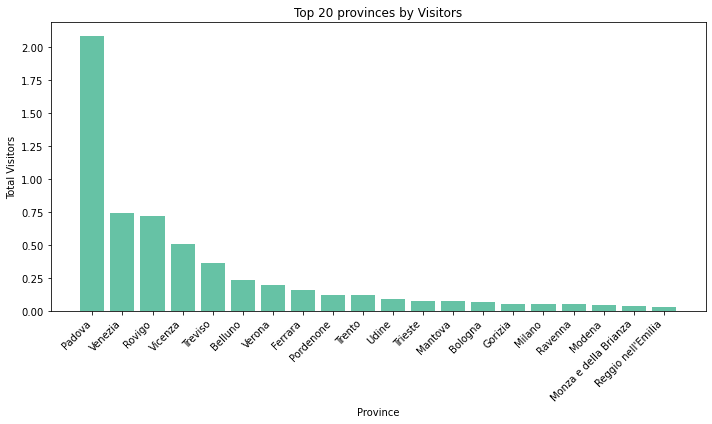

In [14]:
#plot figure

plt.figure(figsize=(10, 6))
plt.bar(province_visitors_top_df['PROVINCIA'], province_visitors_top_df['WEIGHTED_VISITORS'], color='#66c2a5')
plt.xlabel('Province')
plt.ylabel('Total Visitors')
plt.title('Top 20 provinces by Visitors')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 2. Study of the visitors' fluxes

In [15]:
#create a dictionary according to the province position at the highways
positions = {'south'      : ['Bologna', 'Ferrara', 'Rovigo'], 
             'west'       : ['Torino', 'Vercelli', 'Novara', 'Milano', 'Monza e della Brianza', 
                            'Bergamo', 'Brescia', 'Verona', 'Vicenza'],
             'north-east' : ['Venezia', 'Treviso', 'Udine', 'Gorizia', 'Trieste']}

In [16]:
#create a dataframe from dictionary
provinces = [province for province_list in positions.values() for province in province_list]
destinations = [direction for direction in positions.keys() for _ in range(len(positions[direction]))]

positions_df = pd.DataFrame({'PROVINCIA': provinces, 'DIRECTION': destinations})
positions_df

,PROVINCIA,DIRECTION
0,Bologna,south
1,Ferrara,south
2,Rovigo,south
3,Torino,west
4,Vercelli,west
5,Novara,west
6,Milano,west
7,Monza e della Brianza,west
8,Bergamo,west
9,Brescia,west


In [17]:
#merge the final dataframe from 1.2 with destinations dataframe

province_directions_df = province_visitors_top_df.merge(positions_df[['PROVINCIA','DIRECTION']], 
                                                          on = 'PROVINCIA', how = 'left') 

In [18]:
#group datagrame according to number of visitors per each destination, get rid of not interested columns
province_directions_df = province_directions_df.groupby('DIRECTION').sum().drop(columns =
                                                    ['COD_PRO','WEIGHTED_VISITORS'])
province_directions_df

,VISITORS,POPULATION
DIRECTION,,
north-east,1010752,2592397.0
south,290276,1577554.0
west,821584,5865829.0


In [19]:
#calculate weighted number of visitors according to the population value per each destination
province_directions_df['WEIGHTED_PER_D'] = province_directions_df['VISITORS'] / province_directions_df['POPULATION']
province_directions_df

,VISITORS,POPULATION,WEIGHTED_PER_D
DIRECTION,,,
north-east,1010752,2592397.0,0.389891
south,290276,1577554.0,0.184004
west,821584,5865829.0,0.140063


According to the results obtained, destination north-east (A4 towards Venice - Trieste) should be considered as prioritized direction.

Project has been done by Daria Nikolaeva, 2071418